## Content

<ul>
    <li> Dataframes </li>
    <li> Visual </li>
</ul>

## Indroduction

This is the laub loomis model we are going to go through. We exploring the simulations of the laub loomis solved by the euler method. Then go through the predictions given. by the neural network

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Dataframes

This is the data showing the simulations of the laub loomis system. 

In [2]:
laub_df = pd.DataFrame(data = pd.read_csv("../../data/train/laub.csv"))
laub_df

time         x         y         z         w         p         q  \
0         0.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1         0.1  1.046344  1.089278  0.977479  1.067052  0.969840  0.759887   
2         0.2  1.085316  1.159105  0.949473  1.129410  0.939626  0.584872   
3         0.3  1.116813  1.212209  0.916103  1.188790  0.909574  0.457412   
4         0.4  1.140811  1.250961  0.878194  1.246728  0.879699  0.364638   
...       ...       ...       ...       ...       ...       ...       ...   
639995  499.5  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639996  499.6  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639997  499.7  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639998  499.8  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639999  499.9  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   

               m  initial_x  initial_y  initial_z  initial_w  initial_p  \
0       1.000000          1          1          1          1          1   
1       0.999591          1          1          1          1          1   
2       0.954383          1          1          1          1          1   
3       0.883737          1          1          1          1          1   
4       0.801426          1          1          1          1          1   
...          ...        ...        ...        ...        ...        ...   
639995  0.274146          2          2          2          2          2   
639996  0.274146          2          2          2          2          2   
639997  0.274146          2          2          2          2          2   
639998  0.274146          2          2          2          2          2   
639999  0.274146          2          2          2          2          2   

        initial_q  initial_m  
0               1          1  
1               1          1  
2               1          1  
3               1          1  
4               1          1  
...           ...        ...  
639995          2          2  
639996          2          2  
639997          2          2  
639998          2          2  
639999          2          2  

[640000 rows x 15 columns]

This is makes a new columns and wraps the initials variables into a tuple

In [3]:
laub_df['init_x,init_y,init_z,init_w,init_p,init_q,init_m'] = list(zip(laub_df.initial_x, 
                                                                      laub_df.initial_y,
                                                                      laub_df.initial_z,
                                                                      laub_df.initial_w,
                                                                      laub_df.initial_p,
                                                                      laub_df.initial_q,))
laub_df

time         x         y         z         w         p         q  \
0         0.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1         0.1  1.046344  1.089278  0.977479  1.067052  0.969840  0.759887   
2         0.2  1.085316  1.159105  0.949473  1.129410  0.939626  0.584872   
3         0.3  1.116813  1.212209  0.916103  1.188790  0.909574  0.457412   
4         0.4  1.140811  1.250961  0.878194  1.246728  0.879699  0.364638   
...       ...       ...       ...       ...       ...       ...       ...   
639995  499.5  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639996  499.6  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639997  499.7  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639998  499.8  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639999  499.9  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   

               m  initial_x  initial_y  initial_z  initial_w  initial_p  \
0       1.000000          1          1          1          1          1   
1       0.999591          1          1          1          1          1   
2       0.954383          1          1          1          1          1   
3       0.883737          1          1          1          1          1   
4       0.801426          1          1          1          1          1   
...          ...        ...        ...        ...        ...        ...   
639995  0.274146          2          2          2          2          2   
639996  0.274146          2          2          2          2          2   
639997  0.274146          2          2          2          2          2   
639998  0.274146          2          2          2          2          2   
639999  0.274146          2          2          2          2          2   

        initial_q  initial_m init_x,init_y,init_z,init_w,init_p,init_q,init_m  
0               1          1                               (1, 1, 1, 1, 1, 1)  
1               1          1                               (1, 1, 1, 1, 1, 1)  
2               1          1                               (1, 1, 1, 1, 1, 1)  
3               1          1                               (1, 1, 1, 1, 1, 1)  
4               1          1                               (1, 1, 1, 1, 1, 1)  
...           ...        ...                                              ...  
639995          2          2                               (2, 2, 2, 2, 2, 2)  
639996          2          2                               (2, 2, 2, 2, 2, 2)  
639997          2          2                               (2, 2, 2, 2, 2, 2)  
639998          2          2                               (2, 2, 2, 2, 2, 2)  
639999          2          2                               (2, 2, 2, 2, 2, 2)  

[640000 rows x 16 columns]

This is selections all of the initial variables which are equal to 1

In [4]:
laub_df_x1y1 = laub_df[laub_df['init_x,init_y,init_z,init_w,init_p,init_q,init_m'] == (1, 1, 1, 1, 1, 1)]
laub_df_x1y1

time         x         y         z         w         p         q  \
0       0.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1       0.1  1.046344  1.089278  0.977479  1.067052  0.969840  0.759887   
2       0.2  1.085316  1.159105  0.949473  1.129410  0.939626  0.584872   
3       0.3  1.116813  1.212209  0.916103  1.188790  0.909574  0.457412   
4       0.4  1.140811  1.250961  0.878194  1.246728  0.879699  0.364638   
...     ...       ...       ...       ...       ...       ...       ...   
9995  499.5  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
9996  499.6  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
9997  499.7  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
9998  499.8  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
9999  499.9  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   

             m  initial_x  initial_y  initial_z  initial_w  initial_p  \
0     1.000000          1          1          1          1          1   
1     0.999591          1          1          1          1          1   
2     0.954383          1          1          1          1          1   
3     0.883737          1          1          1          1          1   
4     0.801426          1          1          1          1          1   
...        ...        ...        ...        ...        ...        ...   
9995  0.274146          1          1          1          1          1   
9996  0.274146          1          1          1          1          1   
9997  0.274146          1          1          1          1          1   
9998  0.274146          1          1          1          1          1   
9999  0.274146          1          1          1          1          1   

      initial_q  initial_m init_x,init_y,init_z,init_w,init_p,init_q,init_m  
0             1          1                               (1, 1, 1, 1, 1, 1)  
1             1          1                               (1, 1, 1, 1, 1, 1)  
2             1          1                               (1, 1, 1, 1, 1, 1)  
3             1          1                               (1, 1, 1, 1, 1, 1)  
4             1          1                               (1, 1, 1, 1, 1, 1)  
...         ...        ...                                              ...  
9995          1          2                               (1, 1, 1, 1, 1, 1)  
9996          1          2                               (1, 1, 1, 1, 1, 1)  
9997          1          2                               (1, 1, 1, 1, 1, 1)  
9998          1          2                               (1, 1, 1, 1, 1, 1)  
9999          1          2                               (1, 1, 1, 1, 1, 1)  

[10000 rows x 16 columns]

This reads the predictions made by the neural network of the simulations of laub loomis

In [5]:
laub_df_preds = pd.DataFrame(data = pd.read_csv("../../data/preds/train/loomis.csv"))
laub_df_preds

time  initial_x  initial_y  initial_z  initial_w  initial_p  \
0         0.0          1          1          1          1          1   
1         0.1          1          1          1          1          1   
2         0.2          1          1          1          1          1   
3         0.3          1          1          1          1          1   
4         0.4          1          1          1          1          1   
...       ...        ...        ...        ...        ...        ...   
639995  499.5          2          2          2          2          2   
639996  499.6          2          2          2          2          2   
639997  499.7          2          2          2          2          2   
639998  499.8          2          2          2          2          2   
639999  499.9          2          2          2          2          2   

        initial_q  initial_m         x         y         z         w  \
0               1          1  1.503833  1.482483  1.205257  1.108073   
1               1          1  1.489523  1.475474  1.079805  1.207287   
2               1          1  1.476325  1.468469  0.946737  1.306513   
3               1          1  1.462973  1.461464  0.823316  1.405738   
4               1          1  1.441904  1.454458  0.722418  1.504692   
...           ...        ...       ...       ...       ...       ...   
639995          2          2  0.869605  0.386415  0.559593  2.765283   
639996          2          2  0.869606  0.386424  0.559592  2.765288   
639997          2          2  0.869603  0.386423  0.559595  2.765294   
639998          2          2  0.869599  0.386427  0.559596  2.765297   
639999          2          2  0.869596  0.386432  0.559595  2.765298   

               p         q         m  
0       1.156660  0.972759  1.163456  
1       1.066869  0.733253  0.978269  
2       0.977079  0.493747  0.802738  
3       0.894024  0.324778  0.646935  
4       0.831165  0.215094  0.521288  
...          ...       ...       ...  
639995  0.219508  0.076897  0.272386  
639996  0.219508  0.076895  0.272384  
639997  0.219504  0.076896  0.272387  
639998  0.219499  0.076894  0.272387  
639999  0.219504  0.076892  0.272383  

[640000 rows x 15 columns]

In [6]:
laub_df_preds['init_x,init_y,init_z,init_w,init_p,init_q,init_m'] = list(zip(laub_df_preds.initial_x, 
                                                                      laub_df_preds.initial_y,
                                                                      laub_df_preds.initial_z,
                                                                      laub_df_preds.initial_w,
                                                                      laub_df_preds.initial_p,
                                                                      laub_df_preds.initial_q,))
laub_df_preds

time  initial_x  initial_y  initial_z  initial_w  initial_p  \
0         0.0          1          1          1          1          1   
1         0.1          1          1          1          1          1   
2         0.2          1          1          1          1          1   
3         0.3          1          1          1          1          1   
4         0.4          1          1          1          1          1   
...       ...        ...        ...        ...        ...        ...   
639995  499.5          2          2          2          2          2   
639996  499.6          2          2          2          2          2   
639997  499.7          2          2          2          2          2   
639998  499.8          2          2          2          2          2   
639999  499.9          2          2          2          2          2   

        initial_q  initial_m         x         y         z         w  \
0               1          1  1.503833  1.482483  1.205257  1.108073   
1               1          1  1.489523  1.475474  1.079805  1.207287   
2               1          1  1.476325  1.468469  0.946737  1.306513   
3               1          1  1.462973  1.461464  0.823316  1.405738   
4               1          1  1.441904  1.454458  0.722418  1.504692   
...           ...        ...       ...       ...       ...       ...   
639995          2          2  0.869605  0.386415  0.559593  2.765283   
639996          2          2  0.869606  0.386424  0.559592  2.765288   
639997          2          2  0.869603  0.386423  0.559595  2.765294   
639998          2          2  0.869599  0.386427  0.559596  2.765297   
639999          2          2  0.869596  0.386432  0.559595  2.765298   

               p         q         m  \
0       1.156660  0.972759  1.163456   
1       1.066869  0.733253  0.978269   
2       0.977079  0.493747  0.802738   
3       0.894024  0.324778  0.646935   
4       0.831165  0.215094  0.521288   
...          ...       ...       ...   
639995  0.219508  0.076897  0.272386   
639996  0.219508  0.076895  0.272384   
639997  0.219504  0.076896  0.272387   
639998  0.219499  0.076894  0.272387   
639999  0.219504  0.076892  0.272383   

       init_x,init_y,init_z,init_w,init_p,init_q,init_m  
0                                    (1, 1, 1, 1, 1, 1)  
1                                    (1, 1, 1, 1, 1, 1)  
2                                    (1, 1, 1, 1, 1, 1)  
3                                    (1, 1, 1, 1, 1, 1)  
4                                    (1, 1, 1, 1, 1, 1)  
...                                                 ...  
639995                               (2, 2, 2, 2, 2, 2)  
639996                               (2, 2, 2, 2, 2, 2)  
639997                               (2, 2, 2, 2, 2, 2)  
639998                               (2, 2, 2, 2, 2, 2)  
639999                               (2, 2, 2, 2, 2, 2)  

[640000 rows x 16 columns]

This selects the initial variables which all equals to one

In [7]:
laub_df_preds_x1y1 = laub_df[laub_df['init_x,init_y,init_z,init_w,init_p,init_q,init_m'] == (1, 1, 1, 1, 1, 1)]
laub_df_preds_x1y1

time         x         y         z         w         p         q  \
0       0.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1       0.1  1.046344  1.089278  0.977479  1.067052  0.969840  0.759887   
2       0.2  1.085316  1.159105  0.949473  1.129410  0.939626  0.584872   
3       0.3  1.116813  1.212209  0.916103  1.188790  0.909574  0.457412   
4       0.4  1.140811  1.250961  0.878194  1.246728  0.879699  0.364638   
...     ...       ...       ...       ...       ...       ...       ...   
9995  499.5  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
9996  499.6  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
9997  499.7  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
9998  499.8  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
9999  499.9  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   

             m  initial_x  initial_y  initial_z  initial_w  initial_p  \
0     1.000000          1          1          1          1          1   
1     0.999591          1          1          1          1          1   
2     0.954383          1          1          1          1          1   
3     0.883737          1          1          1          1          1   
4     0.801426          1          1          1          1          1   
...        ...        ...        ...        ...        ...        ...   
9995  0.274146          1          1          1          1          1   
9996  0.274146          1          1          1          1          1   
9997  0.274146          1          1          1          1          1   
9998  0.274146          1          1          1          1          1   
9999  0.274146          1          1          1          1          1   

      initial_q  initial_m init_x,init_y,init_z,init_w,init_p,init_q,init_m  
0             1          1                               (1, 1, 1, 1, 1, 1)  
1             1          1                               (1, 1, 1, 1, 1, 1)  
2             1          1                               (1, 1, 1, 1, 1, 1)  
3             1          1                               (1, 1, 1, 1, 1, 1)  
4             1          1                               (1, 1, 1, 1, 1, 1)  
...         ...        ...                                              ...  
9995          1          2                               (1, 1, 1, 1, 1, 1)  
9996          1          2                               (1, 1, 1, 1, 1, 1)  
9997          1          2                               (1, 1, 1, 1, 1, 1)  
9998          1          2                               (1, 1, 1, 1, 1, 1)  
9999          1          2                               (1, 1, 1, 1, 1, 1)  

[10000 rows x 16 columns]

This renames the x,y,z,w,p,q,m variables to add additional "preds" prefix. This would be useful later when combining the two dataframes: the preditions made by the neural network and the actual simulations

In [8]:
laub_df_preds_rename = laub_df_preds.rename(columns={
                                            'x' : 'x_preds',
                                            'y' : 'y_preds',
                                            'z' : 'z_preds',
                                            'w' : 'w_preds',
                                            'p' : 'p_preds',
                                            'q' : 'q_preds',
                                            'm' : 'm_preds',
                                            })
laub_df_preds_rename

time  initial_x  initial_y  initial_z  initial_w  initial_p  \
0         0.0          1          1          1          1          1   
1         0.1          1          1          1          1          1   
2         0.2          1          1          1          1          1   
3         0.3          1          1          1          1          1   
4         0.4          1          1          1          1          1   
...       ...        ...        ...        ...        ...        ...   
639995  499.5          2          2          2          2          2   
639996  499.6          2          2          2          2          2   
639997  499.7          2          2          2          2          2   
639998  499.8          2          2          2          2          2   
639999  499.9          2          2          2          2          2   

        initial_q  initial_m   x_preds   y_preds   z_preds   w_preds  \
0               1          1  1.503833  1.482483  1.205257  1.108073   
1               1          1  1.489523  1.475474  1.079805  1.207287   
2               1          1  1.476325  1.468469  0.946737  1.306513   
3               1          1  1.462973  1.461464  0.823316  1.405738   
4               1          1  1.441904  1.454458  0.722418  1.504692   
...           ...        ...       ...       ...       ...       ...   
639995          2          2  0.869605  0.386415  0.559593  2.765283   
639996          2          2  0.869606  0.386424  0.559592  2.765288   
639997          2          2  0.869603  0.386423  0.559595  2.765294   
639998          2          2  0.869599  0.386427  0.559596  2.765297   
639999          2          2  0.869596  0.386432  0.559595  2.765298   

         p_preds   q_preds   m_preds  \
0       1.156660  0.972759  1.163456   
1       1.066869  0.733253  0.978269   
2       0.977079  0.493747  0.802738   
3       0.894024  0.324778  0.646935   
4       0.831165  0.215094  0.521288   
...          ...       ...       ...   
639995  0.219508  0.076897  0.272386   
639996  0.219508  0.076895  0.272384   
639997  0.219504  0.076896  0.272387   
639998  0.219499  0.076894  0.272387   
639999  0.219504  0.076892  0.272383   

       init_x,init_y,init_z,init_w,init_p,init_q,init_m  
0                                    (1, 1, 1, 1, 1, 1)  
1                                    (1, 1, 1, 1, 1, 1)  
2                                    (1, 1, 1, 1, 1, 1)  
3                                    (1, 1, 1, 1, 1, 1)  
4                                    (1, 1, 1, 1, 1, 1)  
...                                                 ...  
639995                               (2, 2, 2, 2, 2, 2)  
639996                               (2, 2, 2, 2, 2, 2)  
639997                               (2, 2, 2, 2, 2, 2)  
639998                               (2, 2, 2, 2, 2, 2)  
639999                               (2, 2, 2, 2, 2, 2)  

[640000 rows x 16 columns]

This drops columns, This would be useful again when combining the two dataframes

In [9]:
laub_df_preds_rename_temps = laub_df_preds_rename.drop(columns=['time', 'init_x,init_y,init_z,init_w,init_p,init_q,init_m',
                                        'initial_x','initial_y','initial_z','initial_w',
                                         'initial_p','initial_q','initial_m'])
laub_df_preds_rename_temps

x_preds   y_preds   z_preds   w_preds   p_preds   q_preds   m_preds
0       1.503833  1.482483  1.205257  1.108073  1.156660  0.972759  1.163456
1       1.489523  1.475474  1.079805  1.207287  1.066869  0.733253  0.978269
2       1.476325  1.468469  0.946737  1.306513  0.977079  0.493747  0.802738
3       1.462973  1.461464  0.823316  1.405738  0.894024  0.324778  0.646935
4       1.441904  1.454458  0.722418  1.504692  0.831165  0.215094  0.521288
...          ...       ...       ...       ...       ...       ...       ...
639995  0.869605  0.386415  0.559593  2.765283  0.219508  0.076897  0.272386
639996  0.869606  0.386424  0.559592  2.765288  0.219508  0.076895  0.272384
639997  0.869603  0.386423  0.559595  2.765294  0.219504  0.076896  0.272387
639998  0.869599  0.386427  0.559596  2.765297  0.219499  0.076894  0.272387
639999  0.869596  0.386432  0.559595  2.765298  0.219504  0.076892  0.272383

[640000 rows x 7 columns]

This merges the two dataframes: The predictions made by the neural network, and the actual simulation of the laub loomis model

In [10]:
laub_df_compare = pd.merge(laub_df, laub_df_preds_rename_temps, right_index=True, left_index=True)
laub_df_compare

time         x         y         z         w         p         q  \
0         0.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1         0.1  1.046344  1.089278  0.977479  1.067052  0.969840  0.759887   
2         0.2  1.085316  1.159105  0.949473  1.129410  0.939626  0.584872   
3         0.3  1.116813  1.212209  0.916103  1.188790  0.909574  0.457412   
4         0.4  1.140811  1.250961  0.878194  1.246728  0.879699  0.364638   
...       ...       ...       ...       ...       ...       ...       ...   
639995  499.5  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639996  499.6  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639997  499.7  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639998  499.8  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639999  499.9  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   

               m  initial_x  initial_y  ...  initial_q  initial_m  \
0       1.000000          1          1  ...          1          1   
1       0.999591          1          1  ...          1          1   
2       0.954383          1          1  ...          1          1   
3       0.883737          1          1  ...          1          1   
4       0.801426          1          1  ...          1          1   
...          ...        ...        ...  ...        ...        ...   
639995  0.274146          2          2  ...          2          2   
639996  0.274146          2          2  ...          2          2   
639997  0.274146          2          2  ...          2          2   
639998  0.274146          2          2  ...          2          2   
639999  0.274146          2          2  ...          2          2   

        init_x,init_y,init_z,init_w,init_p,init_q,init_m   x_preds   y_preds  \
0                                     (1, 1, 1, 1, 1, 1)  1.503833  1.482483   
1                                     (1, 1, 1, 1, 1, 1)  1.489523  1.475474   
2                                     (1, 1, 1, 1, 1, 1)  1.476325  1.468469   
3                                     (1, 1, 1, 1, 1, 1)  1.462973  1.461464   
4                                     (1, 1, 1, 1, 1, 1)  1.441904  1.454458   
...                                                  ...       ...       ...   
639995                                (2, 2, 2, 2, 2, 2)  0.869605  0.386415   
639996                                (2, 2, 2, 2, 2, 2)  0.869606  0.386424   
639997                                (2, 2, 2, 2, 2, 2)  0.869603  0.386423   
639998                                (2, 2, 2, 2, 2, 2)  0.869599  0.386427   
639999                                (2, 2, 2, 2, 2, 2)  0.869596  0.386432   

         z_preds   w_preds   p_preds   q_preds   m_preds  
0       1.205257  1.108073  1.156660  0.972759  1.163456  
1       1.079805  1.207287  1.066869  0.733253  0.978269  
2       0.946737  1.306513  0.977079  0.493747  0.802738  
3       0.823316  1.405738  0.894024  0.324778  0.646935  
4       0.722418  1.504692  0.831165  0.215094  0.521288  
...          ...       ...       ...       ...       ...  
639995  0.559593  2.765283  0.219508  0.076897  0.272386  
639996  0.559592  2.765288  0.219508  0.076895  0.272384  
639997  0.559595  2.765294  0.219504  0.076896  0.272387  
639998  0.559596  2.765297  0.219499  0.076894  0.272387  
639999  0.559595  2.765298  0.219504  0.076892  0.272383  

[640000 rows x 23 columns]

This drops columns which are not useful anymore

In [11]:
laub_df_compare = laub_df_compare.drop(columns=['initial_x','initial_y','initial_z','initial_w',
                                         'initial_p','initial_q','initial_m'])
laub_df_compare

time         x         y         z         w         p         q  \
0         0.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1         0.1  1.046344  1.089278  0.977479  1.067052  0.969840  0.759887   
2         0.2  1.085316  1.159105  0.949473  1.129410  0.939626  0.584872   
3         0.3  1.116813  1.212209  0.916103  1.188790  0.909574  0.457412   
4         0.4  1.140811  1.250961  0.878194  1.246728  0.879699  0.364638   
...       ...       ...       ...       ...       ...       ...       ...   
639995  499.5  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639996  499.6  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639997  499.7  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639998  499.8  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   
639999  499.9  0.868930  0.368081  0.558598  2.754150  0.220849  0.084090   

               m init_x,init_y,init_z,init_w,init_p,init_q,init_m   x_preds  \
0       1.000000                               (1, 1, 1, 1, 1, 1)  1.503833   
1       0.999591                               (1, 1, 1, 1, 1, 1)  1.489523   
2       0.954383                               (1, 1, 1, 1, 1, 1)  1.476325   
3       0.883737                               (1, 1, 1, 1, 1, 1)  1.462973   
4       0.801426                               (1, 1, 1, 1, 1, 1)  1.441904   
...          ...                                              ...       ...   
639995  0.274146                               (2, 2, 2, 2, 2, 2)  0.869605   
639996  0.274146                               (2, 2, 2, 2, 2, 2)  0.869606   
639997  0.274146                               (2, 2, 2, 2, 2, 2)  0.869603   
639998  0.274146                               (2, 2, 2, 2, 2, 2)  0.869599   
639999  0.274146                               (2, 2, 2, 2, 2, 2)  0.869596   

         y_preds   z_preds   w_preds   p_preds   q_preds   m_preds  
0       1.482483  1.205257  1.108073  1.156660  0.972759  1.163456  
1       1.475474  1.079805  1.207287  1.066869  0.733253  0.978269  
2       1.468469  0.946737  1.306513  0.977079  0.493747  0.802738  
3       1.461464  0.823316  1.405738  0.894024  0.324778  0.646935  
4       1.454458  0.722418  1.504692  0.831165  0.215094  0.521288  
...          ...       ...       ...       ...       ...       ...  
639995  0.386415  0.559593  2.765283  0.219508  0.076897  0.272386  
639996  0.386424  0.559592  2.765288  0.219508  0.076895  0.272384  
639997  0.386423  0.559595  2.765294  0.219504  0.076896  0.272387  
639998  0.386427  0.559596  2.765297  0.219499  0.076894  0.272387  
639999  0.386432  0.559595  2.765298  0.219504  0.076892  0.272383  

[640000 rows x 16 columns]

This function will be usefull when getting the predictions of the neural network

In [38]:
def hue(var):
    """
        Hue: 
            This would be used later for plotting graphs. It returns a categoried columns to identify the
            actual simulations and predictions from the neural network with the variable var
        Args:
            var (<>): This identify which variable you want to categories.
    """
    dict_columns = { "y" : ["y","y_preds"],
                "x" : ["x","x_preds"],
                "z" : ["z","z_preds"],
                "w" : ["w","w_preds"],
                "p" : ["p","p_preds"],
                "q" : ["q","q_preds"],
                "m" : ["m","m_preds"],}
    dict_columns.pop(var)
    columns = ["init_x,init_y,init_z,init_w,init_p,init_q,init_m","time"]
    for val in dict_columns.values():
        for i in val:
            columns.append(i)
    df = laub_df_compare.melt(columns, var_name=var, value_name="{}vals".format(var))
    return df

##  Visualising

We are going to visualise the graphs

Below we start first by visualising the simulations of the graph

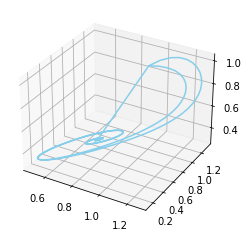

In [13]:
fig_1 = plt.figure()
ax = fig_1.add_subplot(111, projection = '3d')
ax.plot(laub_df_x1y1['x'], laub_df_x1y1['y'], laub_df_x1y1['z'], c='skyblue')

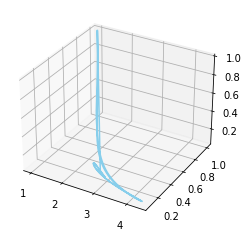

In [14]:
fig_1 = plt.figure()
ax = fig_1.add_subplot(111, projection = '3d')
ax.plot(laub_df_x1y1['w'], laub_df_x1y1['p'], laub_df_x1y1['q'], c='skyblue')

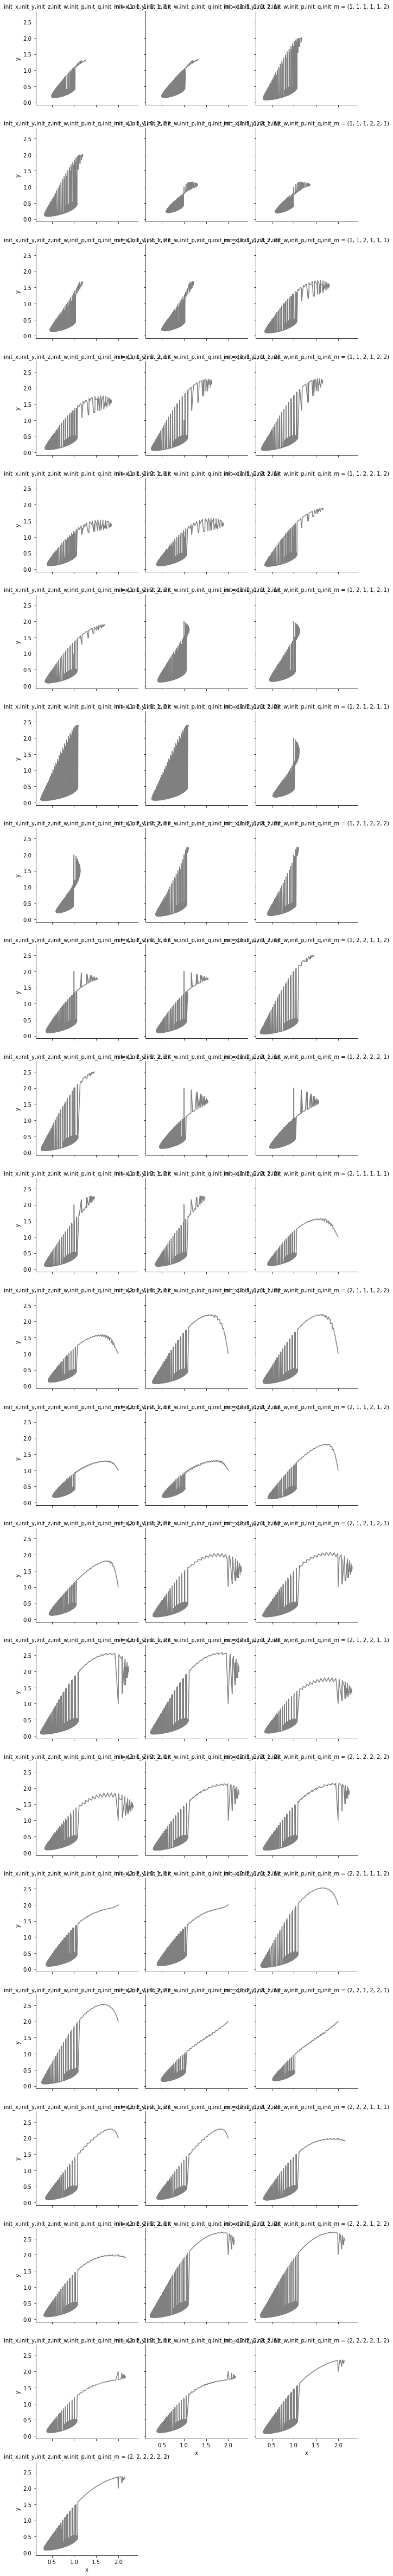

In [15]:
g = sns.FacetGrid(laub_df, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "x", "y", color=".5", ci=None)
g.add_legend()

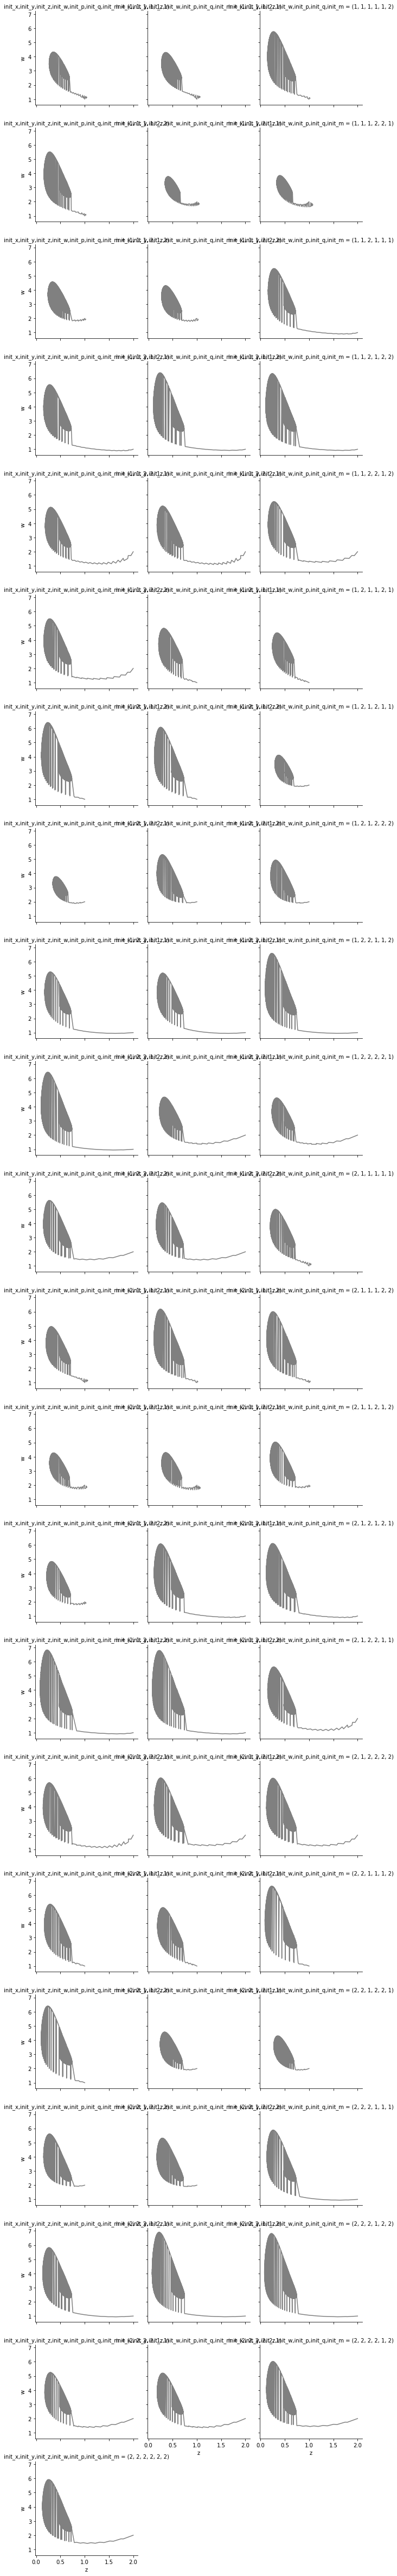

In [16]:
g = sns.FacetGrid(laub_df, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "z", "w", color=".5", ci=None)
g.add_legend()

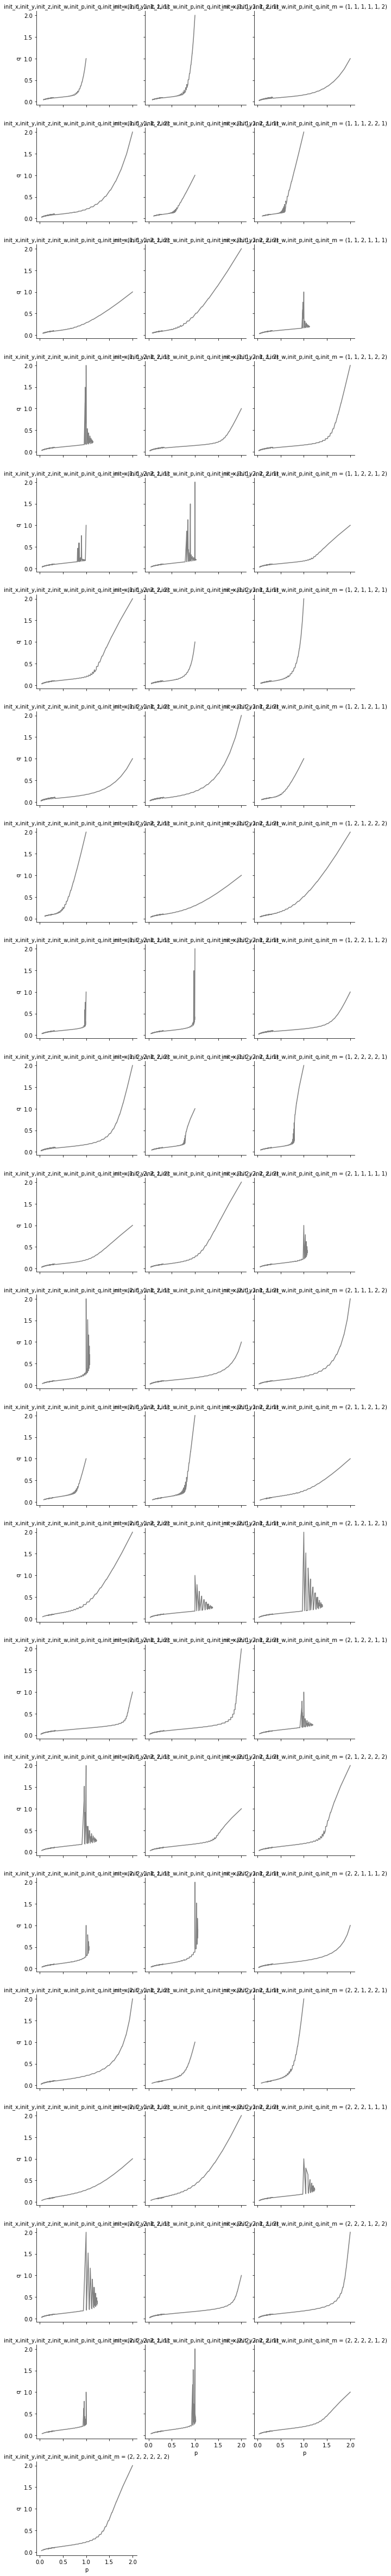

In [17]:
g = sns.FacetGrid(laub_df, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "p", "q", color=".5", ci=None)
g.add_legend()

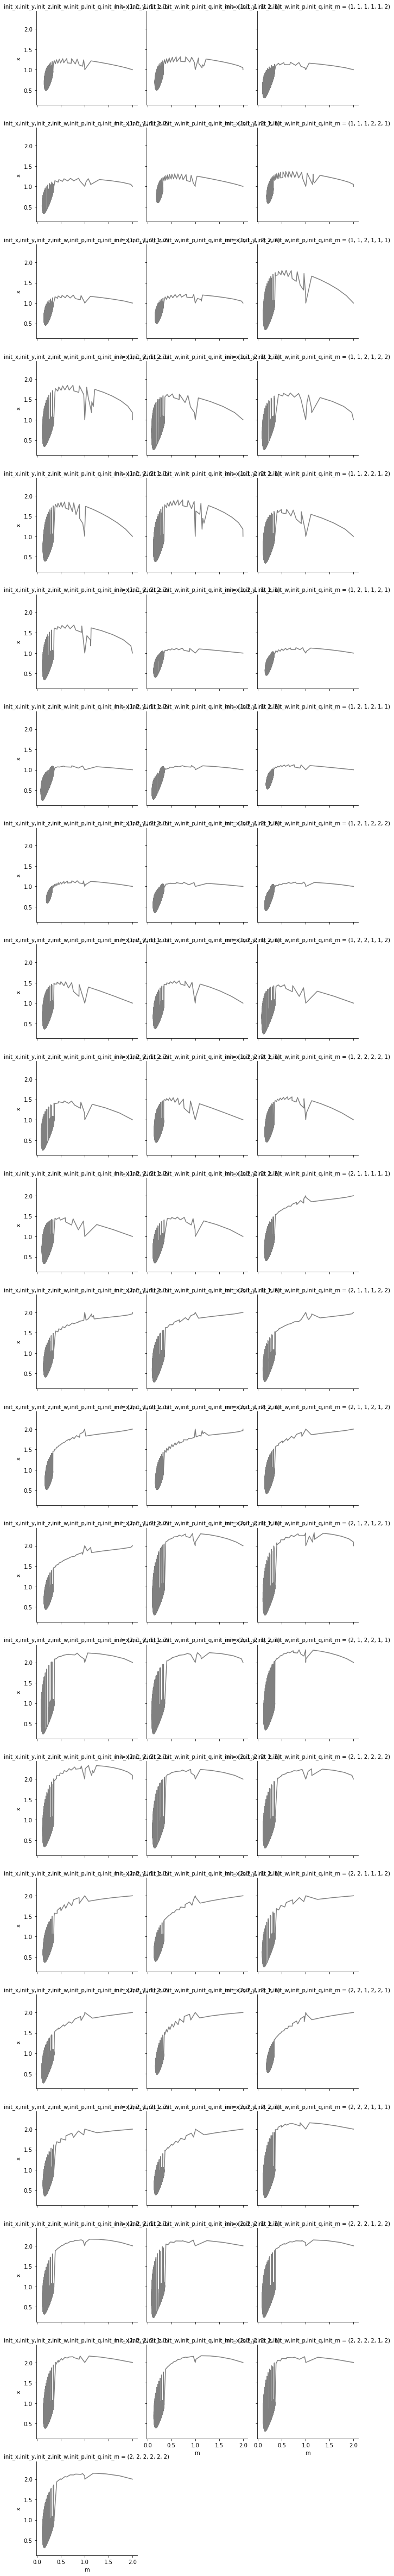

In [18]:
g = sns.FacetGrid(laub_df, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "m", "x", color=".5", ci=None)
g.add_legend()

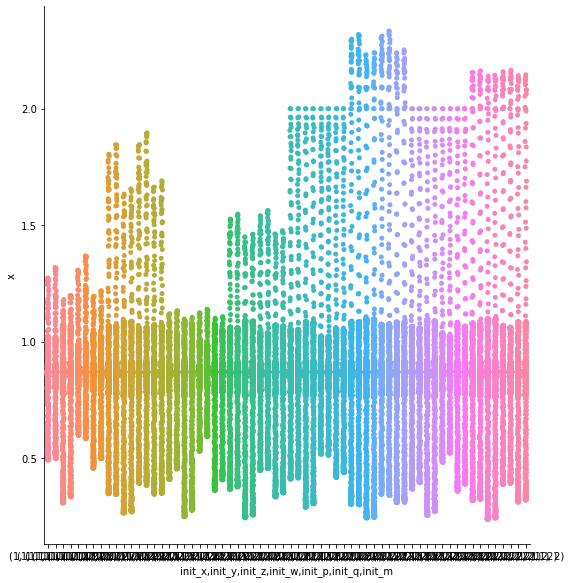

In [26]:
sns.catplot(height=8, data=laub_df, x="init_x,init_y,init_z,init_w,init_p,init_q,init_m", y="x",)

Below we start first by visualising the predictions of simulations given by the neural network

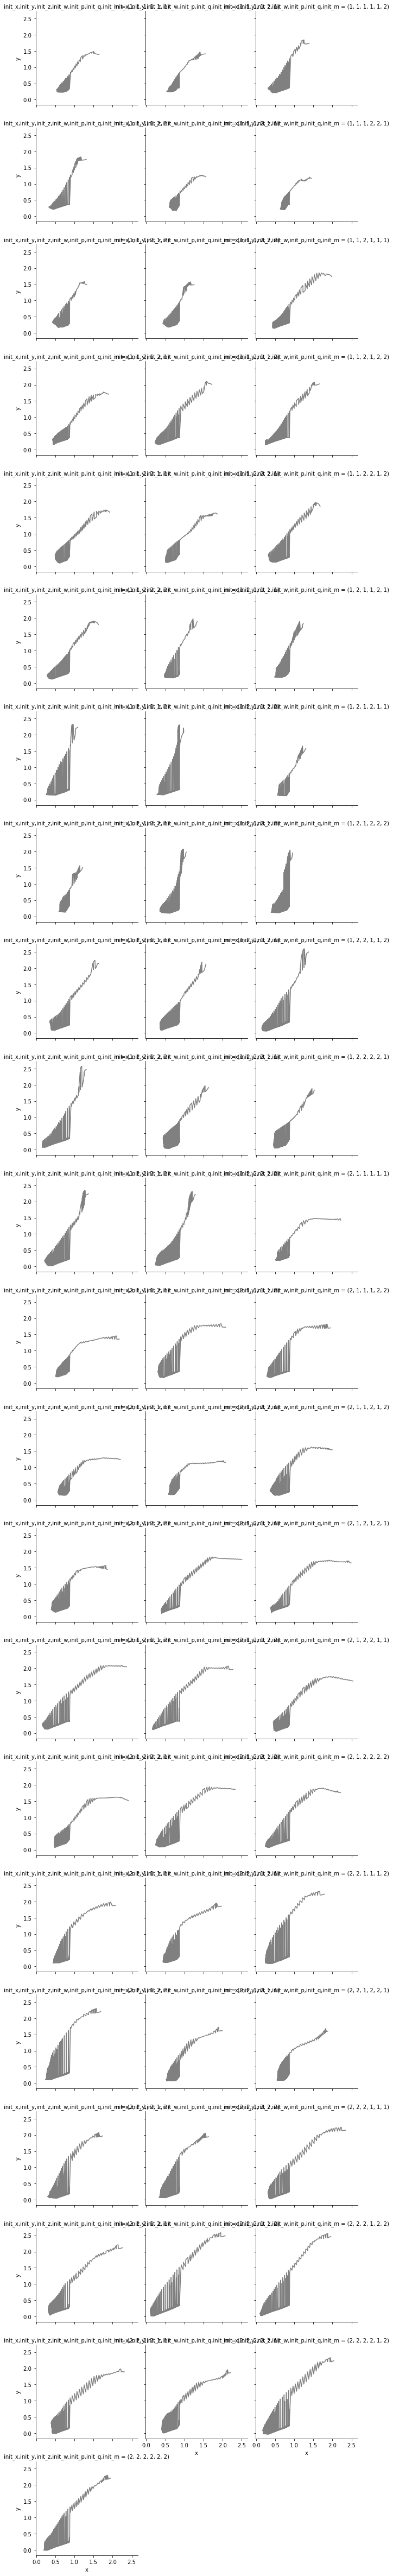

In [27]:
g = sns.FacetGrid(laub_df_preds, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "x", "y", color=".5", ci=None)
g.add_legend()

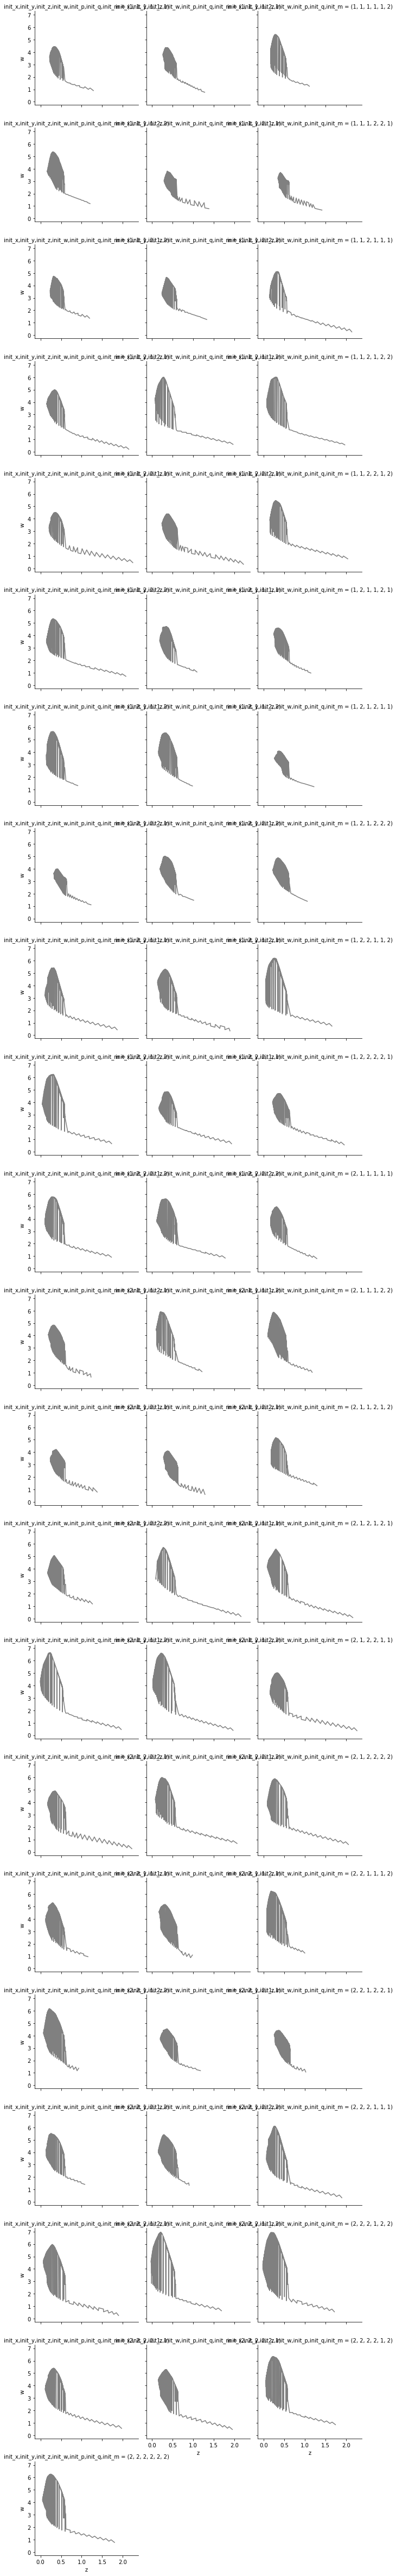

In [28]:
g = sns.FacetGrid(laub_df_preds, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "z", "w", color=".5", ci=None)
g.add_legend()

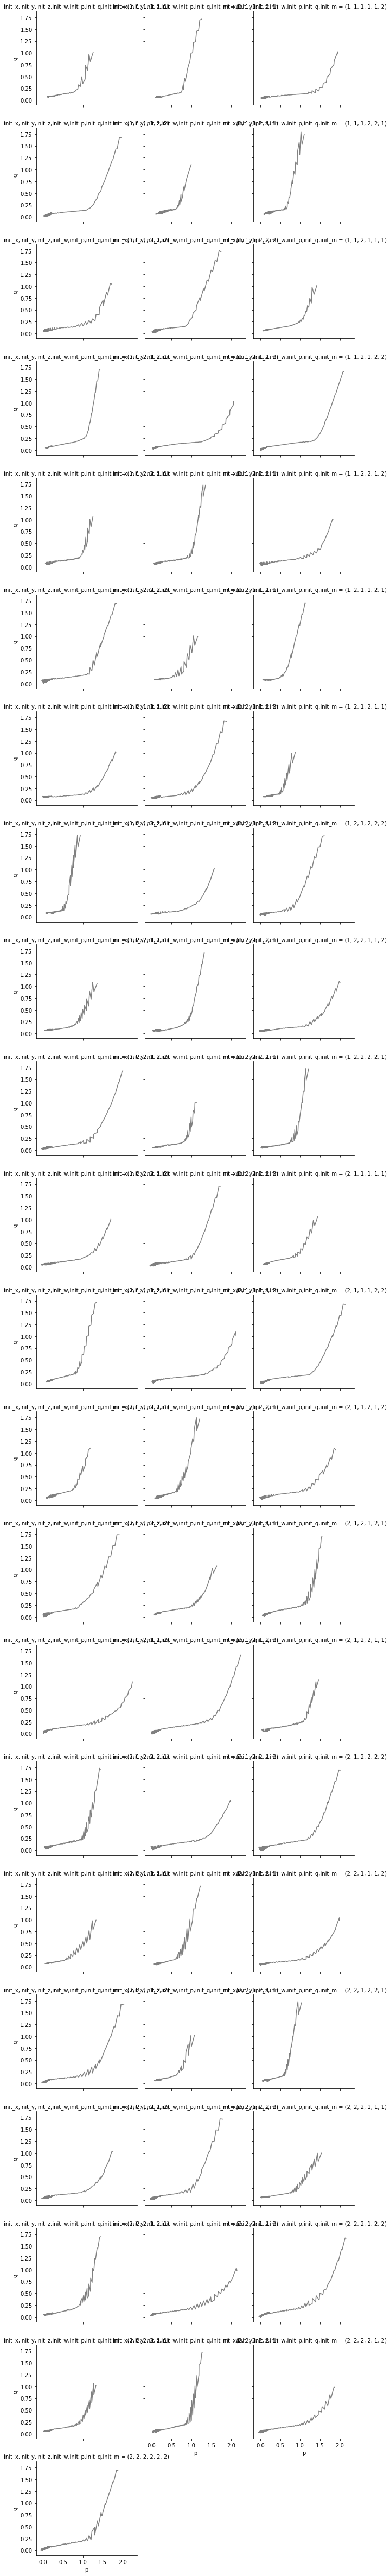

In [29]:
g = sns.FacetGrid(laub_df_preds, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "p", "q", color=".5", ci=None)
g.add_legend()

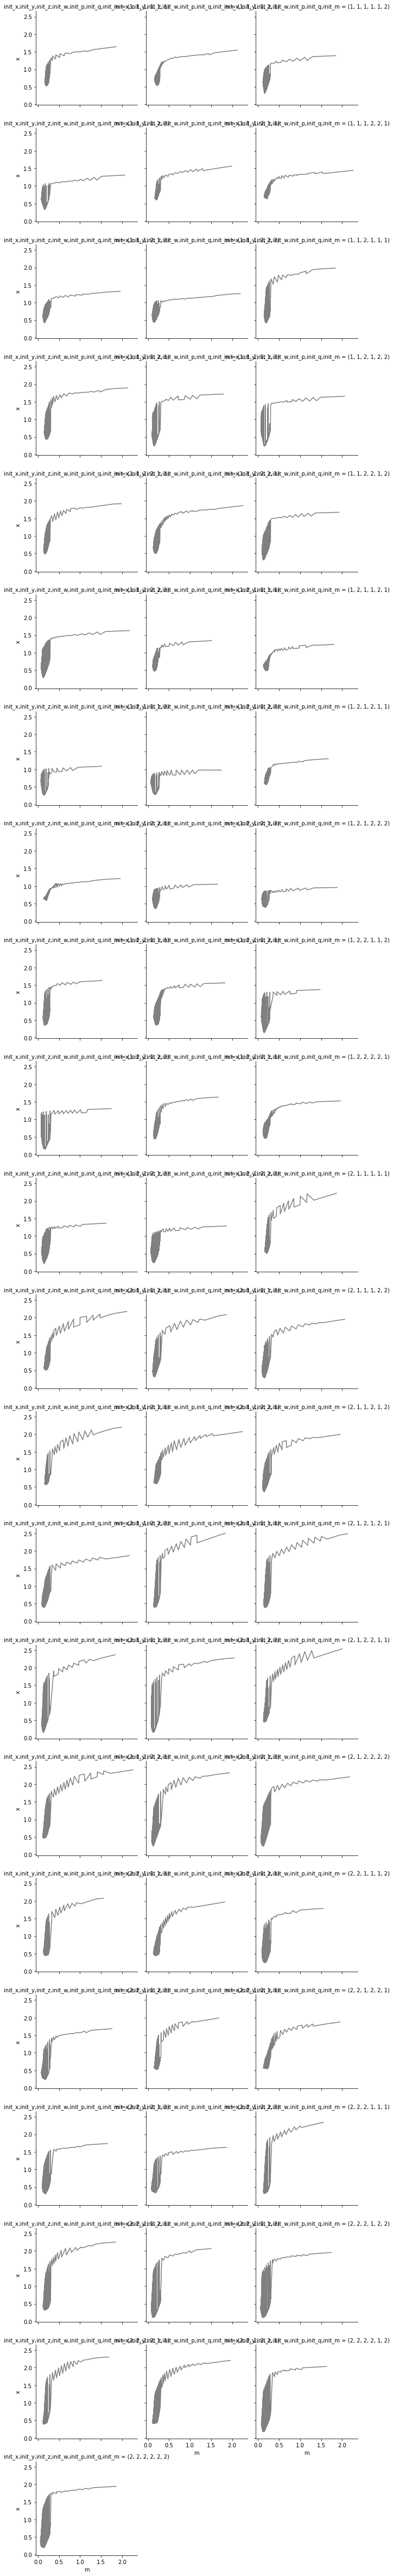

In [30]:
g = sns.FacetGrid(laub_df_preds, col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", col_wrap=3)
g.map(sns.lineplot, "m", "x", color=".5", ci=None)
g.add_legend()

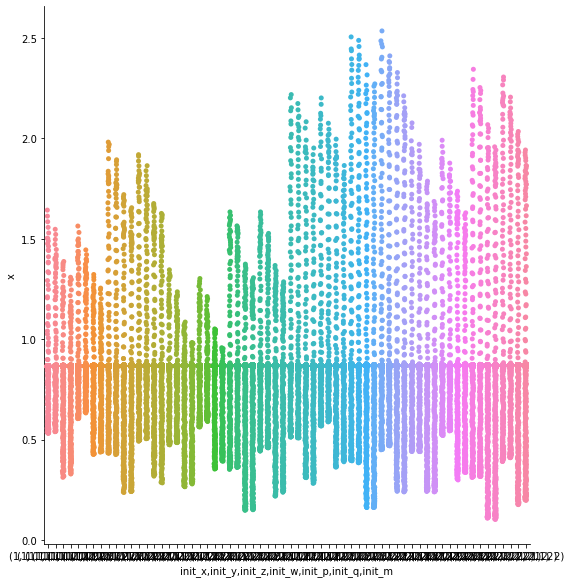

In [31]:
sns.catplot(height=8, data=laub_df_preds, x="init_x,init_y,init_z,init_w,init_p,init_q,init_m", y="x",)

Combining the data

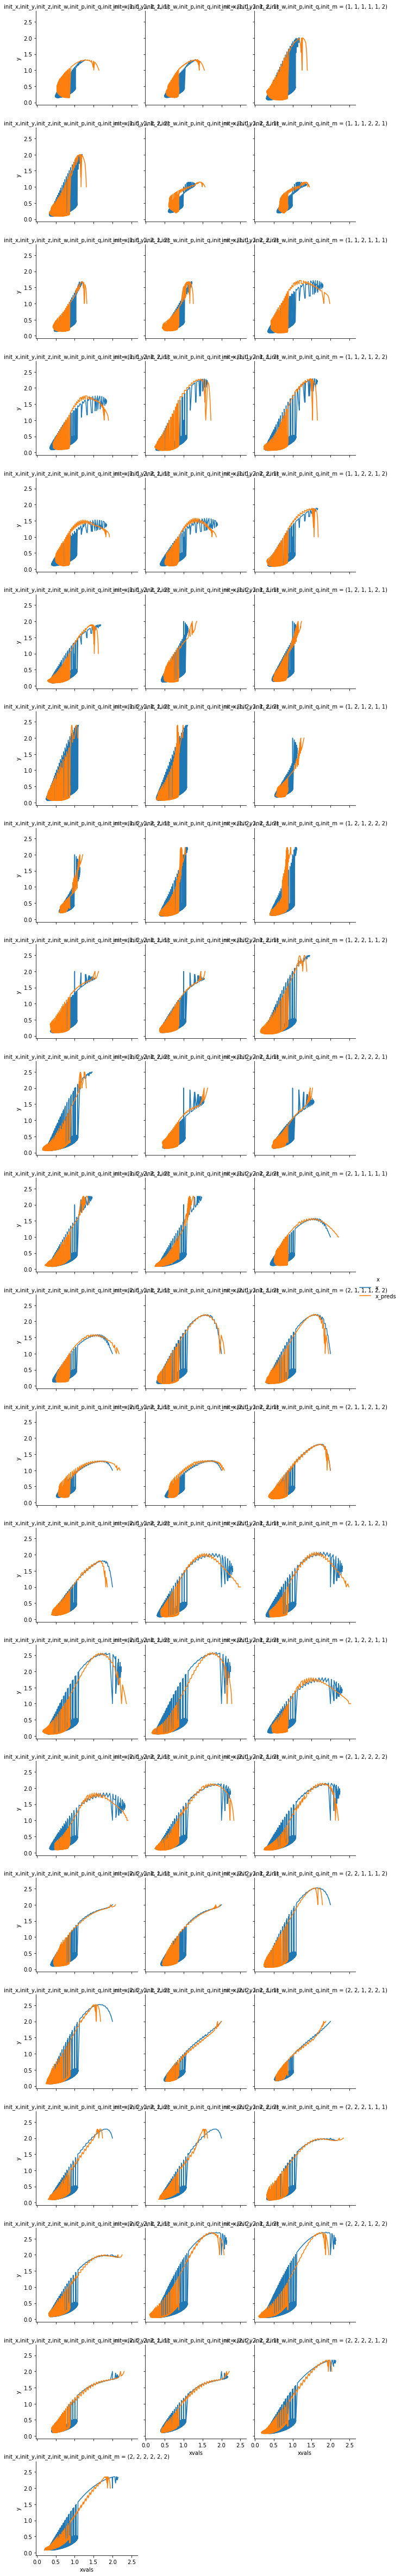

In [34]:
g = sns.FacetGrid(hue("x"), col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", hue="x", col_wrap=3)
g.map(sns.lineplot, "xvals", "y", ci=None)
g.add_legend()

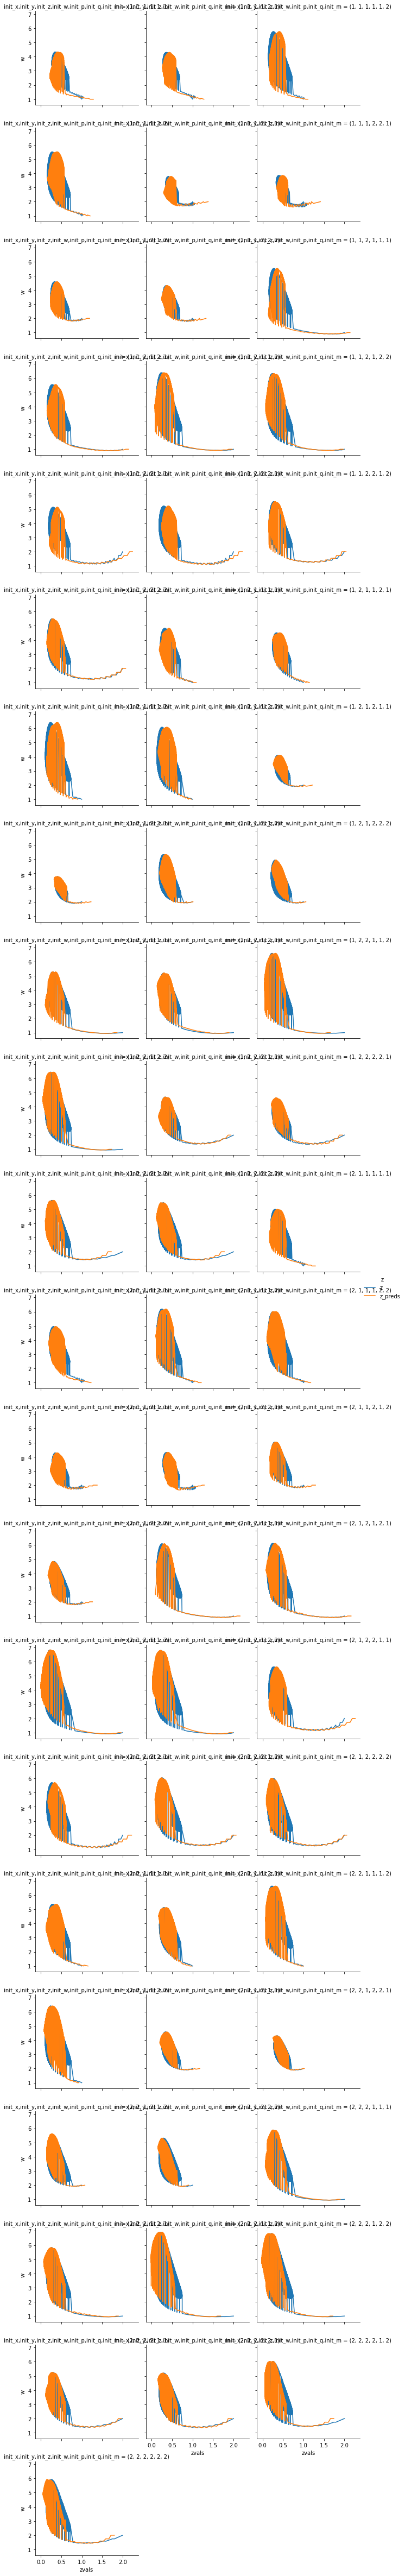

In [39]:
g = sns.FacetGrid(hue("z"), col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", hue="z", col_wrap=3)
g.map(sns.lineplot, "zvals", "w", ci=None)
g.add_legend()

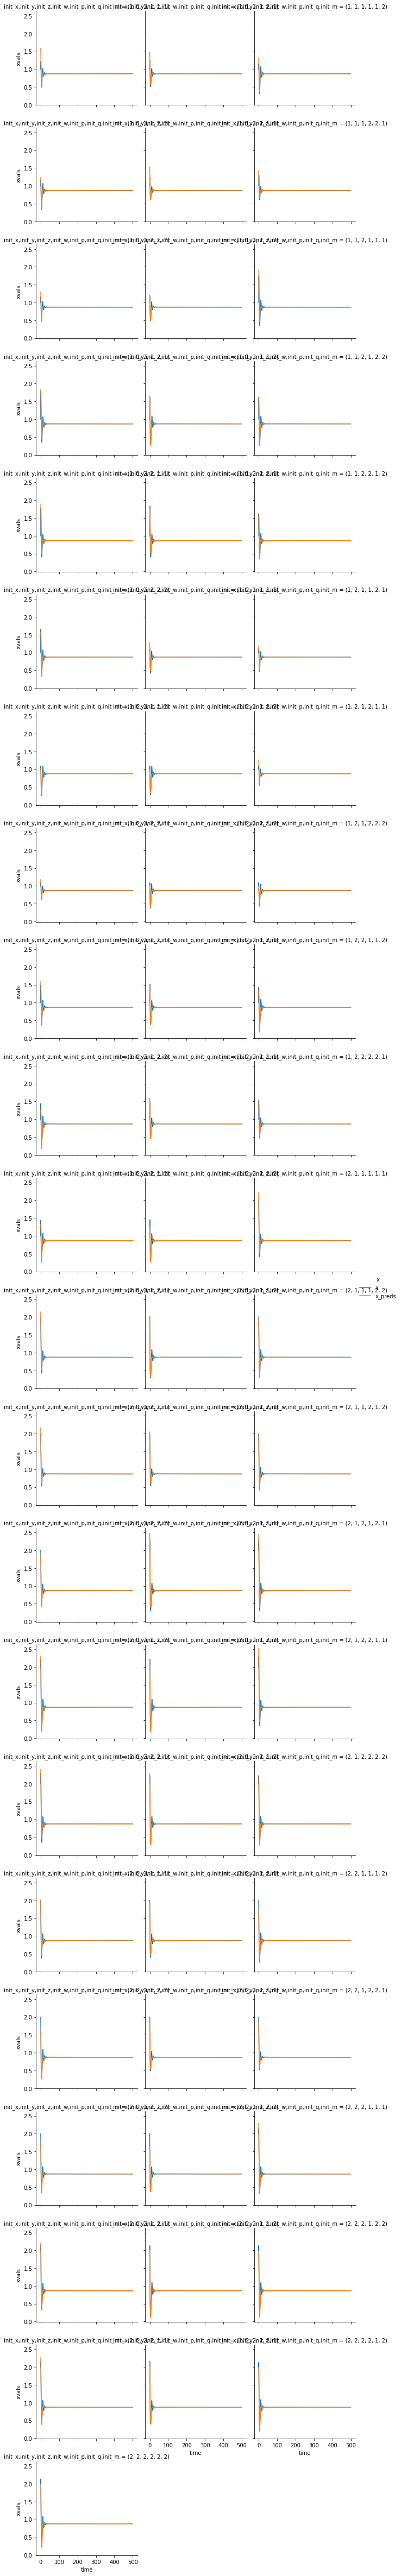

In [46]:
g = sns.FacetGrid(hue("x"), col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", hue="x", col_wrap=3)
g.map(sns.lineplot, "time", "xvals", ci=None)
g.add_legend()

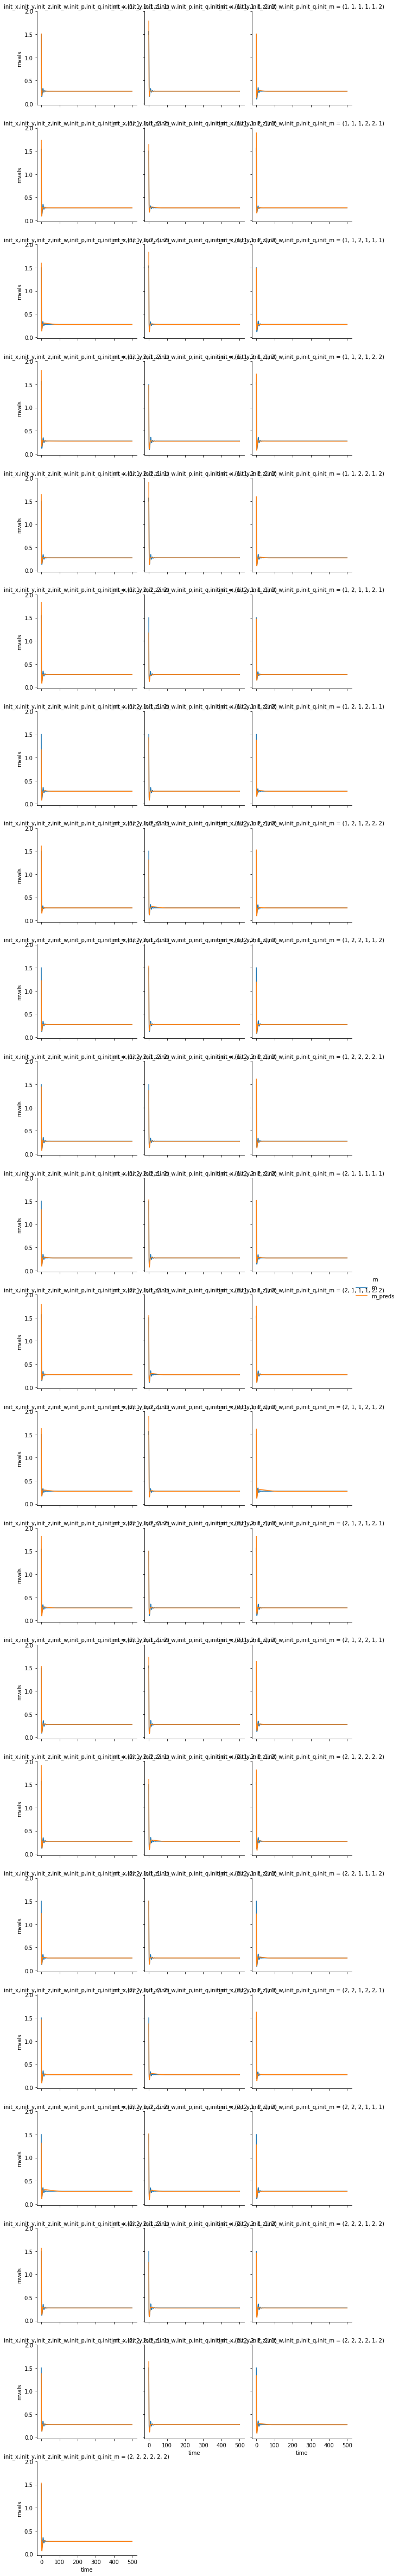

In [47]:
g = sns.FacetGrid(hue("m"), col="init_x,init_y,init_z,init_w,init_p,init_q,init_m", hue="m", col_wrap=3)
g.map(sns.lineplot, "time", "mvals", ci=None)
g.add_legend()